# Retail Sales Prediction - EDA

Dataset context: Making sales prediction in retail often rely on base assumptions such as historical projections. While this might work, with increased uncertaintly in any retail environment, relying on the past might not always be the best approach. In addition, some factors might have more impact on sales than others. Understanding and optimizing those factors can help maximize sales performance accross retail outlets.

Key questions to answer through this project:
- What are the key features that impact sales performance?
- How can we confidently predict future sales?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading data

data source: https://www.kaggle.com/manjeetsingh/retaildataset?select=sales+data-set.csv

In [3]:
features = pd.read_csv('Features data set.csv')
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv')

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [6]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [8]:
features.shape, sales.shape, stores.shape

((8190, 12), (421570, 5), (45, 3))

In [9]:
# Merging the 3 data sets into 1 single data frame
data = stores.merge(sales,  how= 'outer')
data = data.merge(features, how = 'outer')
data.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [10]:
data.shape

(423325, 16)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423325 entries, 0 to 423324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  float64
 3   Dept          421570 non-null  float64
 4   Date          423325 non-null  object 
 5   Weekly_Sales  421570 non-null  float64
 6   IsHoliday     423325 non-null  object 
 7   Temperature   423325 non-null  float64
 8   Fuel_Price    423325 non-null  float64
 9   MarkDown1     152433 non-null  float64
 10  MarkDown2     112532 non-null  float64
 11  MarkDown3     138658 non-null  float64
 12  MarkDown4     136466 non-null  float64
 13  MarkDown5     153187 non-null  float64
 14  CPI           422740 non-null  float64
 15  Unemployment  422740 non-null  float64
dtypes: float64(12), int64(1), object(3)
memory usage: 54.9+ MB


In [12]:
data.IsHoliday.unique()

array([False, True], dtype=object)

There are few issues with the type of some columns which need to be addressed for proper analysis:
- Store: Change the type from int64 to object
- Size: Change the type from float64 to object
- Dept: Change the type from float64 to object
- Date: Change the type from object to datetime
- MarkDown1...MarkDown5: create a new column to sum the total markdowns

In [13]:
# Adressing object types
obj = ['Store', 'Size', 'Dept']

for i in obj:
    data[i] = data[i].astype('object')

In [14]:
# Adressing datetime types
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
# Aggregating all the markdowns
data['MarkDown_Total']  = data['MarkDown1'] + data['MarkDown2'] + data['MarkDown3'] + data['MarkDown4'] + data['MarkDown5']

In [16]:
# Confirming that the changes have been reflected
data.dtypes

Store                     object
Type                      object
Size                      object
Dept                      object
Date              datetime64[ns]
Weekly_Sales             float64
IsHoliday                 object
Temperature              float64
Fuel_Price               float64
MarkDown1                float64
MarkDown2                float64
MarkDown3                float64
MarkDown4                float64
MarkDown5                float64
CPI                      float64
Unemployment             float64
MarkDown_Total           float64
dtype: object

## Variables distribution

### Dependant variabel analysis

In [17]:
# Our dependant variable is Weekly_Sales
data.Weekly_Sales.describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Seem like there are some negative prices which might represent outliers. We need to count the total and make an assumption about them. The basic assumption is that those are mistake or product recall. We might want to get rid of them in case it is not too many instances

In [18]:
# Checking the number of negative values in Weekly_Sales
neg = sum(n<0 for n in data.Weekly_Sales)
print('There are {} values representing {}'.format(neg, neg/len(data)))

There are 1285 values representing 0.003035492824661903


There are 1285 negative sales values representing 0.3% of all the values. We can safely replace that as missing values

In [19]:
# Replacing negative values by nan in Weekly_Sales
data['Weekly_Sales'] = data.replace(data.Weekly_Sales<0, np.nan)
data['Weekly_Sales'] = data.Weekly_Sales.astype('float64')

In [20]:
# Confirming that there is no more negative values in Weekly_Sales
sum(n<0 for n in data.Weekly_Sales)

0

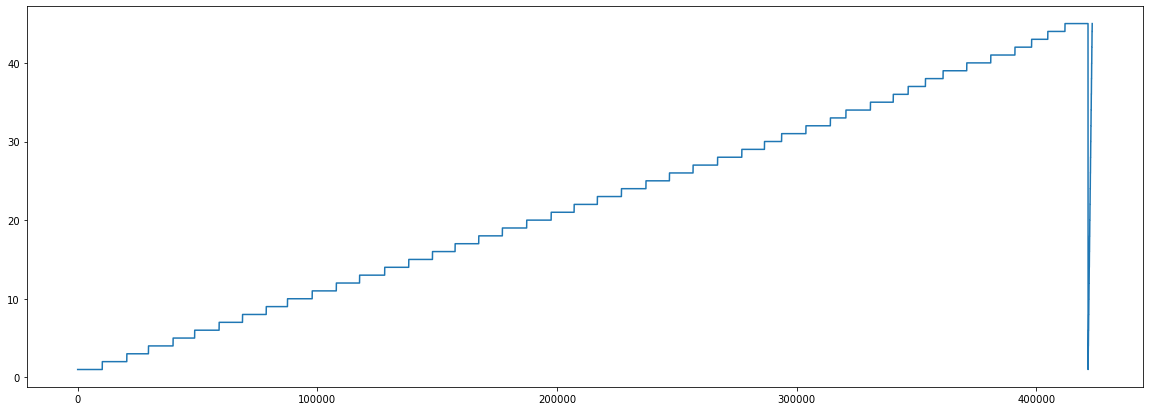

In [21]:
plt.figure(figsize=(20,7))
plt.plot(data.Weekly_Sales)
plt.show()

/Users/judith/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

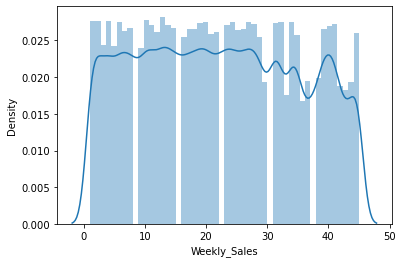

In [22]:
sns.distplot(data.Weekly_Sales)

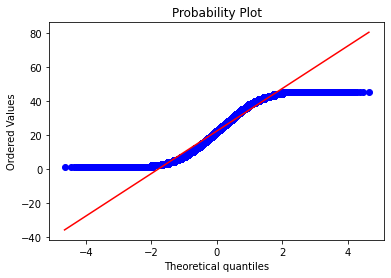

In [23]:
from scipy import stats
fig = plt.figure()
res = stats.probplot(data.Weekly_Sales, plot = plt)

Weekly_Sales doesnt have a normal distribution. It displays a somewhat continuous uniform distribution with some light variation at frequent interval (possibly due to seasonality or markdowns but no major peak and does not fit the diagonal line. Log transformation and others standardization techniques will be required to change the shape to normal.

### Relationship with numerical variables

<AxesSubplot:>

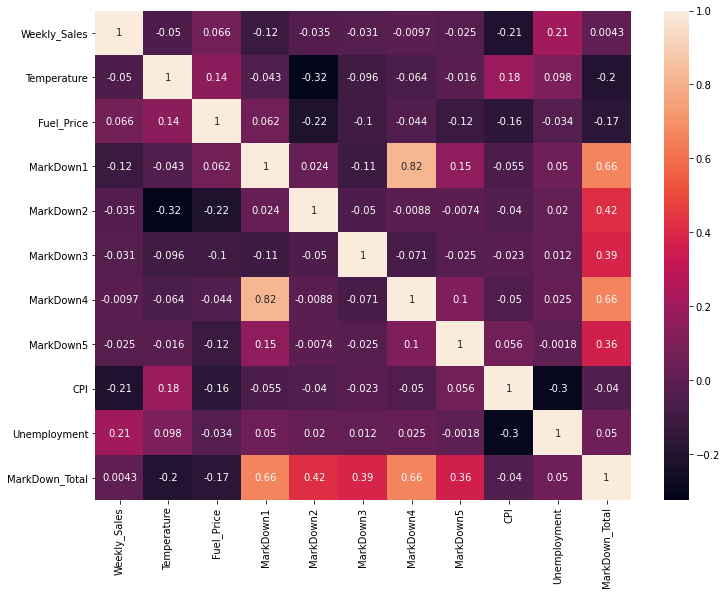

In [24]:
# Plotting the correlation matrix
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(data.corr(), annot = True)

From the heatmap there is no direct strong correlation between Weekly_Sales and others variables. the highest noticeable correlations are:
- unemployment: positive 0,21%
- CPI: -0,21%
- Markdown 1: -0,12%

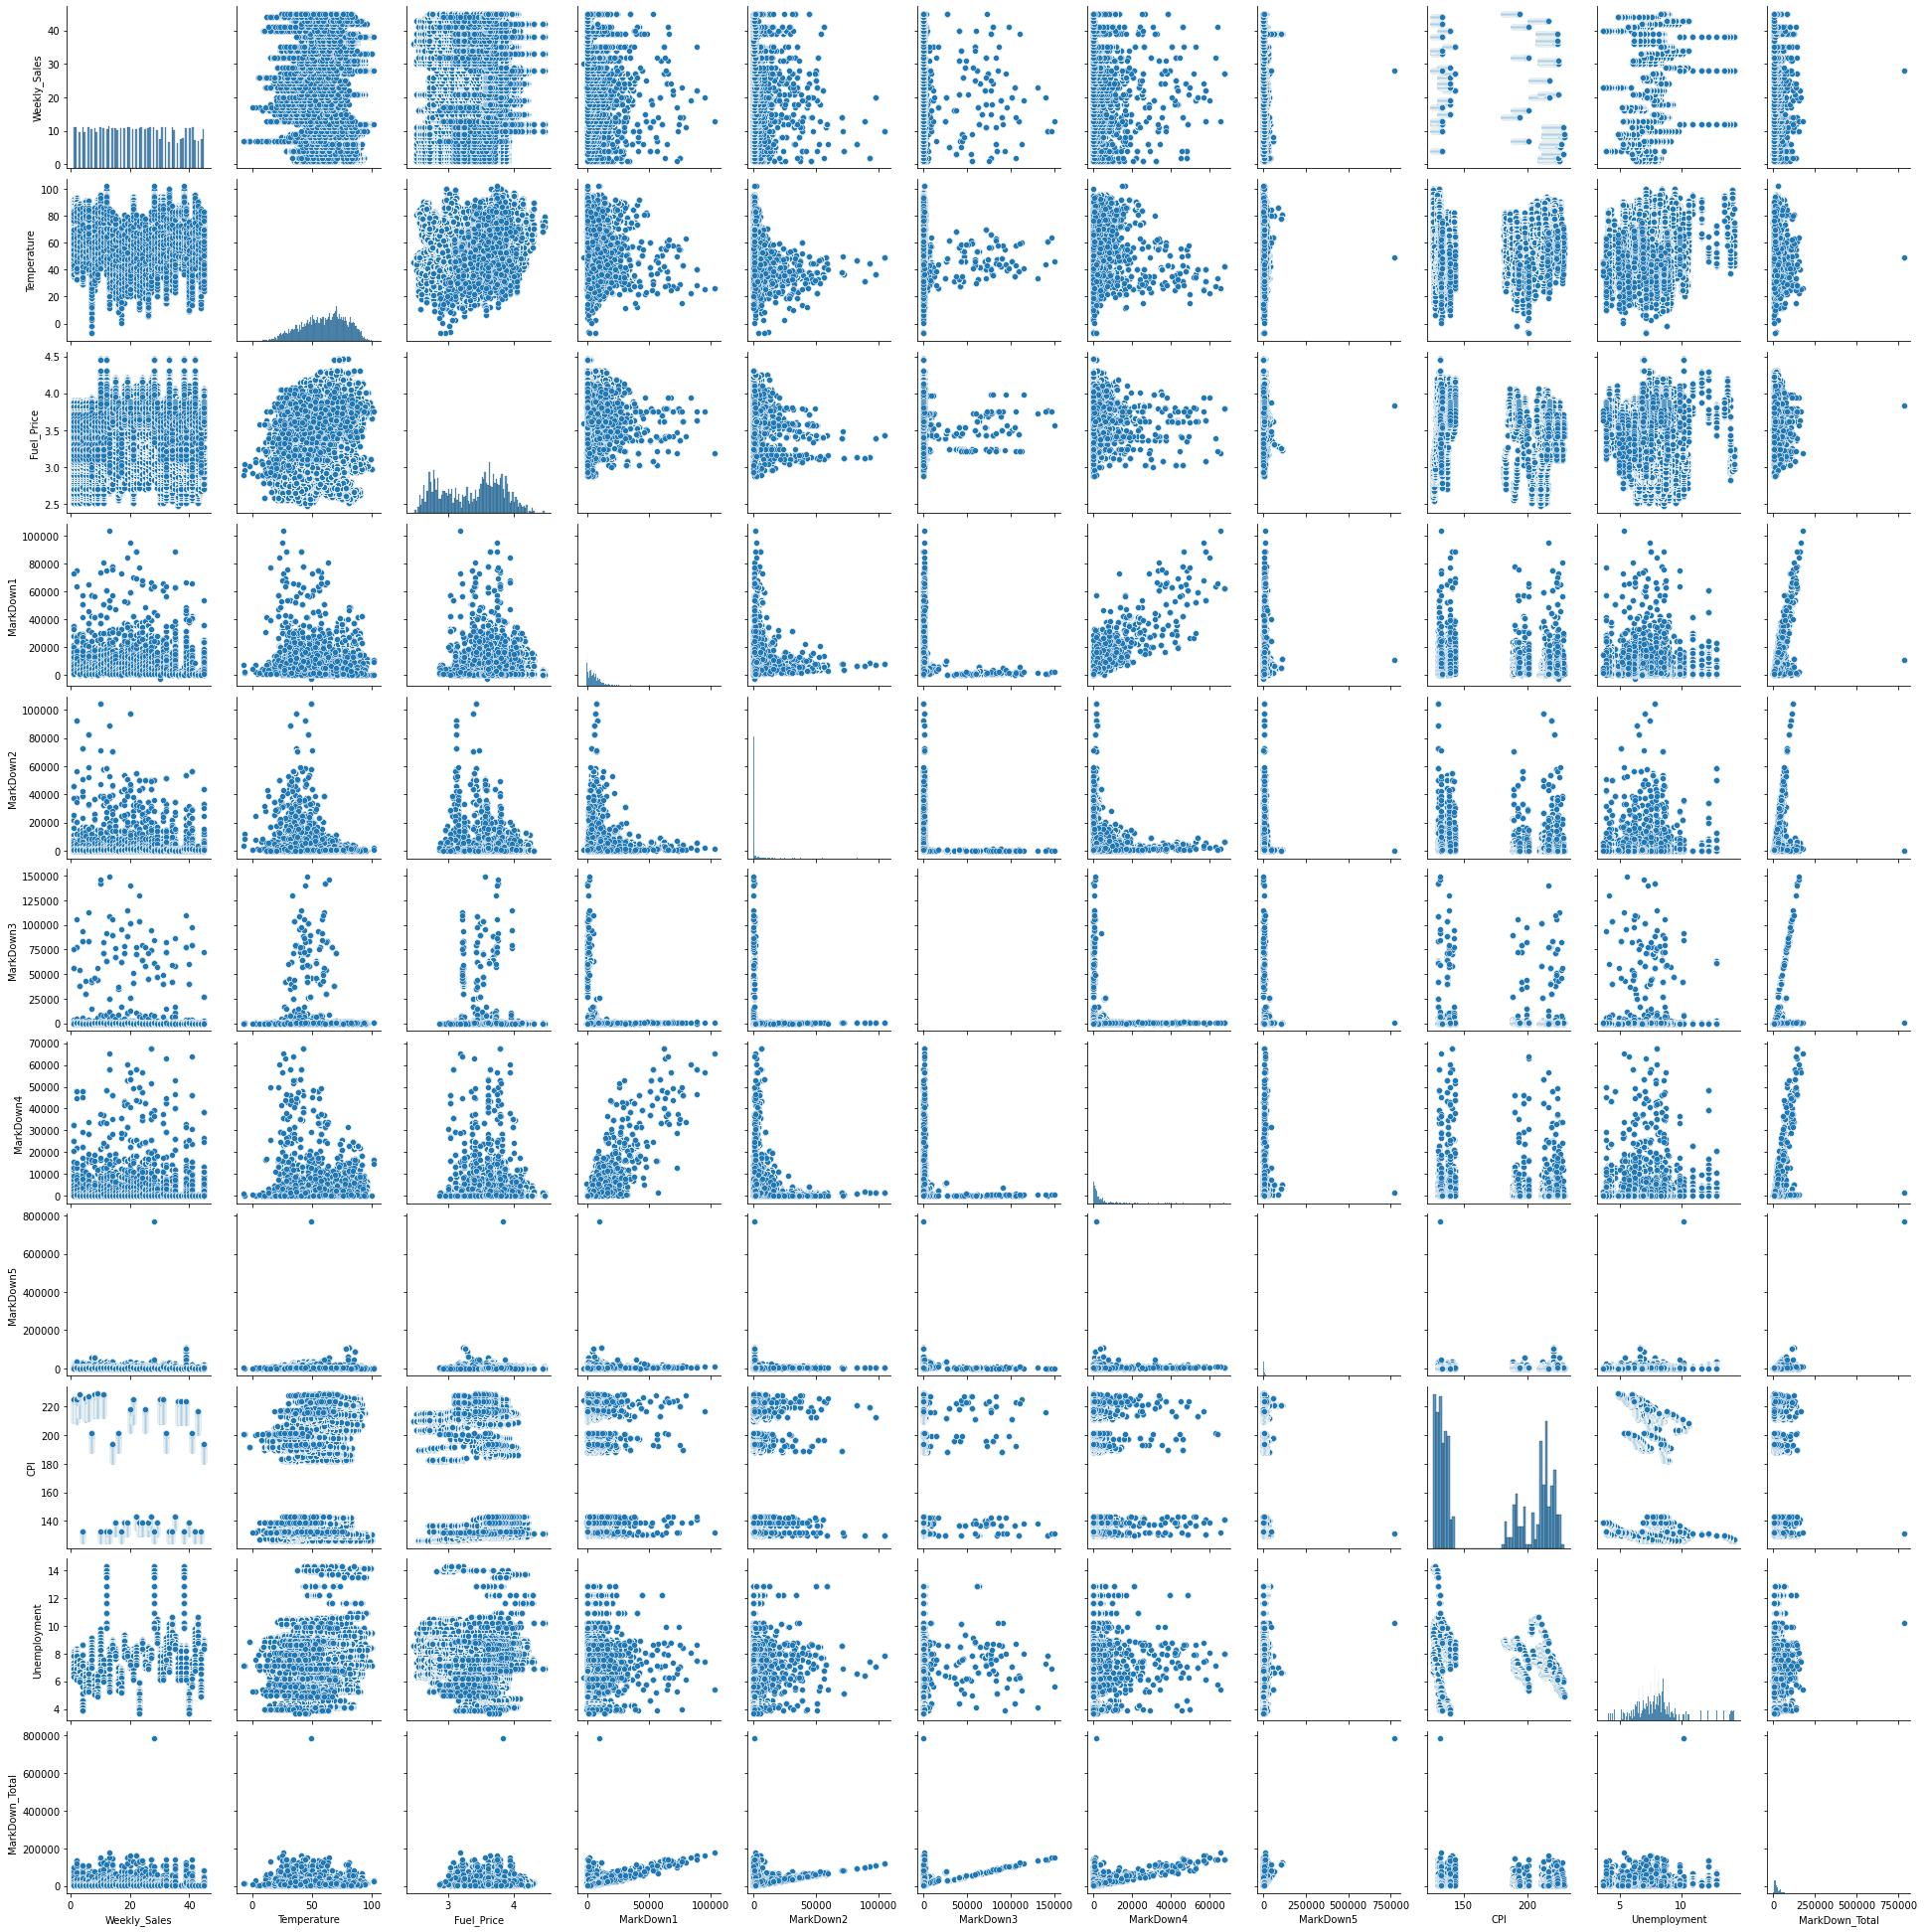

In [25]:
# Pairplot
num_cols = ['Weekly_Sales', 
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'MarkDown_Total']
sns.pairplot(data[num_cols])

In [26]:
# Calculating level of skeweness for all numerical variables.
col =['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'MarkDown_Total']
skew = []
for i in col:
    score = data[i].skew()
    skew.append(score)
skew_df = pd.DataFrame(skew, index = col, columns = ['Skewness'])
skew_df.Skewness.sort_values(ascending = False)

MarkDown5         19.008108
MarkDown3          8.395455
MarkDown2          5.430816
MarkDown4          4.848150
MarkDown1          3.367377
MarkDown_Total     2.752962
Unemployment       1.181317
CPI                0.085270
Weekly_Sales       0.077449
Fuel_Price        -0.108876
Temperature       -0.320460
Name: Skewness, dtype: float64

### Relationship with categorical variables

Analysis below reveals that holiday period doesnt affect much sales. Moreover, Department sales are even accross departments. The type C store has a higher sales average than A and B.

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

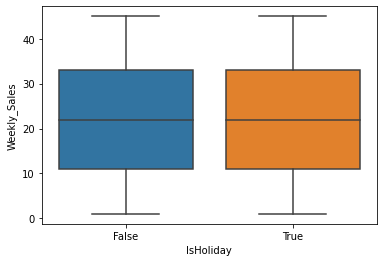

In [27]:
sns.boxplot(x= 'IsHoliday', y= 'Weekly_Sales', data = data )

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

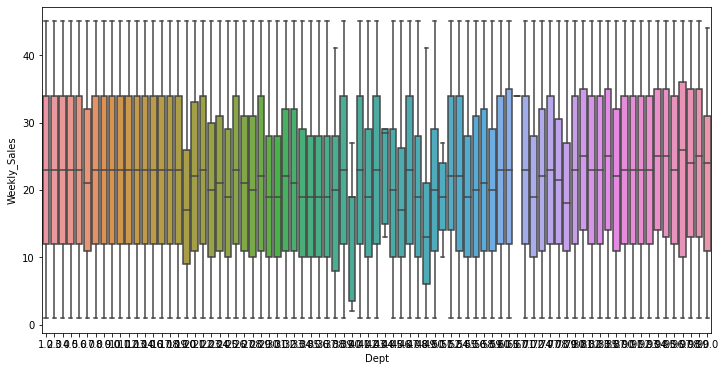

In [28]:
f, ax = plt.subplots(figsize = (12,6))
sns.boxplot(x= 'Dept', y= 'Weekly_Sales', data = data )

<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

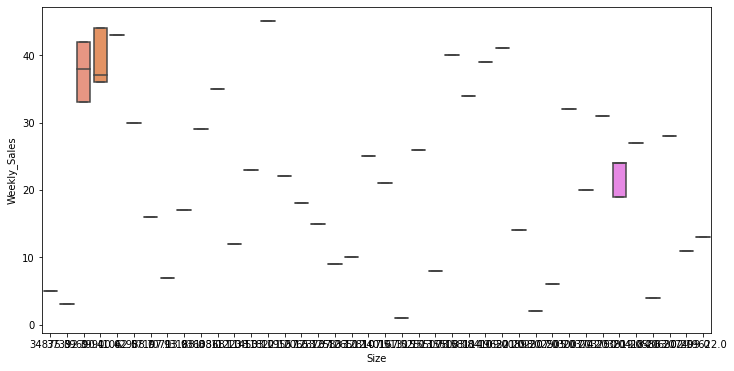

In [29]:
f, ax = plt.subplots(figsize = (12,6))
sns.boxplot(x= 'Size', y= 'Weekly_Sales', data = data )

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

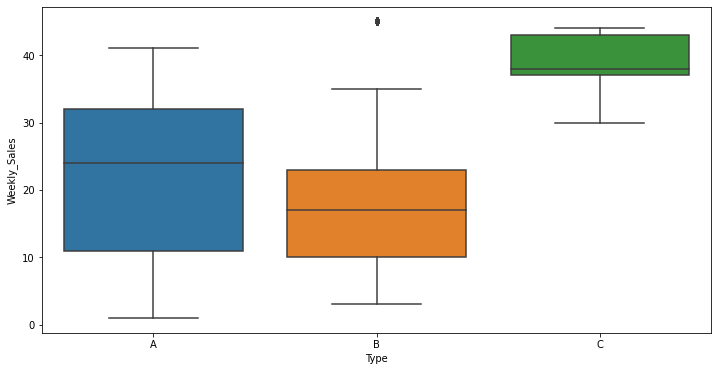

In [30]:
f, ax = plt.subplots(figsize = (12,6))
sns.boxplot(x= 'Type', y= 'Weekly_Sales', data = data )

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

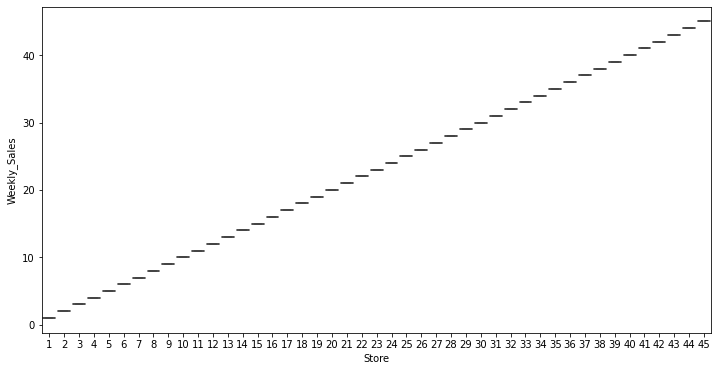

In [31]:
f, ax = plt.subplots(figsize = (12,6))
sns.boxplot(x= 'Store', y= 'Weekly_Sales', data = data )

### Relationship with datetime variable

We will now analyze the performance of each markdown over time as well as the total markdown to assess if there is any visible trend. The same analysis will be done for the weekly sales as well.

Analysis below reveals the following:
- All markdowns have been on mostly during the same period, hence their effect is not dissociab
- Mardown1 is on all year round and display 2 peaks from 2012 to 2014. Its also have the highest correlation with weekly sales meaning it had more impact than others markdowns
- Markdown2 has 4 peaks and has been on and off
- Markdown3 has been very tactical with only 2 period of activity. We can assume it impact on sales is limited
_ Markdown 4 and 5 displays the same behavior as mardown 1, being active all year round with occasional peak.
- Overall weekly sales present a stable curve overtime with occasional peaks. 

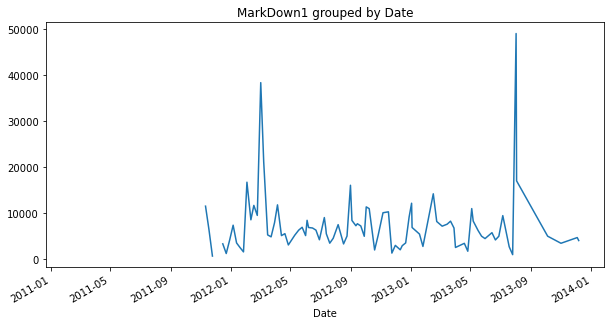

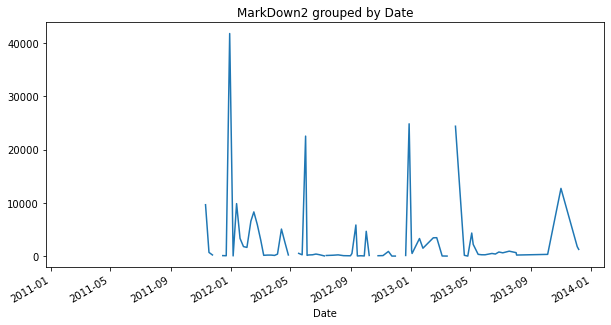

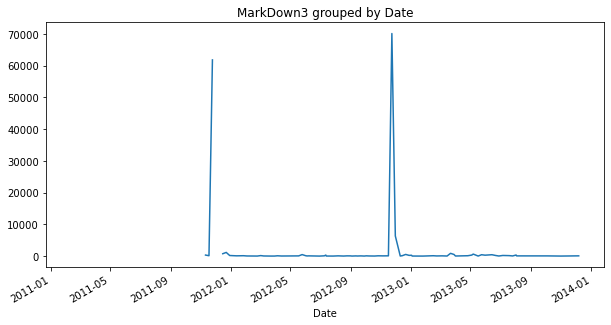

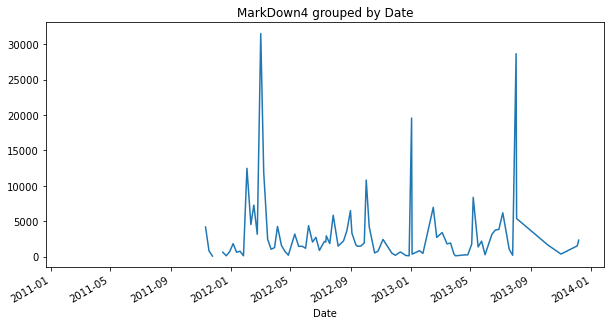

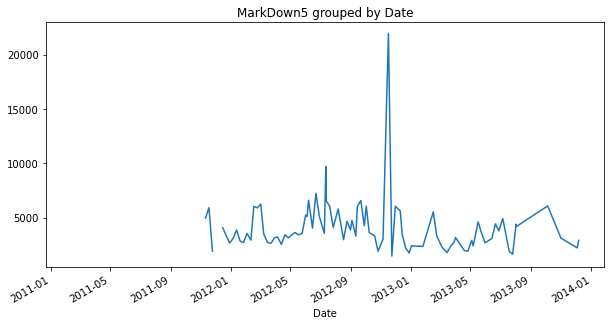

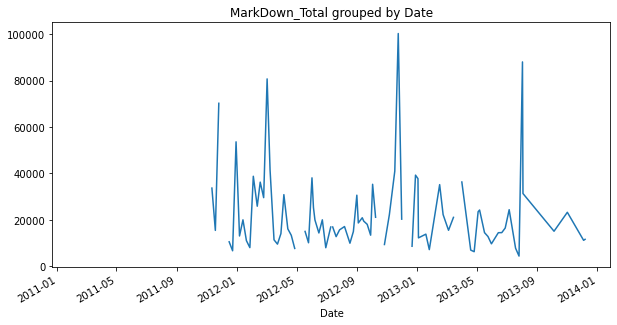

In [32]:
# Markdown performance over time
markdowns = ['MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'MarkDown_Total']
for markdown in markdowns:
    f, ax = plt.subplots(figsize = (10,5))
    data.groupby(by = 'Date')[markdown].mean().sort_index(ascending = True).plot()
    plt.title(markdown + ' grouped by Date')

<AxesSubplot:xlabel='Date'>

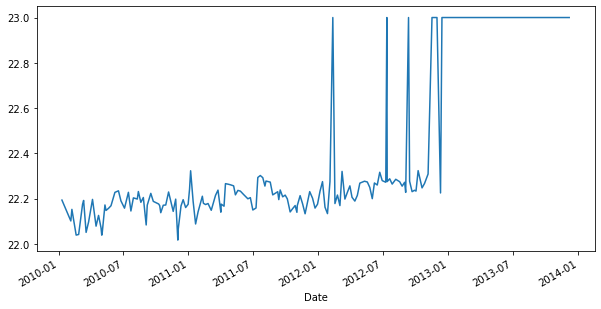

In [33]:
f, ax = plt.subplots(figsize = (10,5))
data.groupby(by = 'Date')['Weekly_Sales'].mean().sort_index(ascending = True).plot()

## Missing data

In [34]:
missing = data.isnull().sum() * 100 / len(data)
missing_df = pd.DataFrame({'missing':missing})
missing_df.missing.sort_values(ascending = False)

MarkDown_Total    76.807181
MarkDown2         73.417115
MarkDown4         67.763302
MarkDown3         67.245497
MarkDown1         63.991496
MarkDown5         63.813382
Size               0.414575
Dept               0.414575
Type               0.414575
Unemployment       0.138192
CPI                0.138192
Store              0.000000
Temperature        0.000000
IsHoliday          0.000000
Weekly_Sales       0.000000
Date               0.000000
Fuel_Price         0.000000
Name: missing, dtype: float64

Missing values imputation strategies:
- Markdowns: We might interpret missing markdown data as the fact that the markdown wasnt 'on' during the period and/for the specific stores. Hence we cannot assume all missing values represent gap in data. We will simply replace the nan values by zero.
- Size, Dept, Type: We can replace missing values by the mode (as they are categorical features)
- Unemployment, CPI: we can use the mean

In [35]:
input_Markdowns = ['MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'MarkDown_Total']
input_cat =  ['Type', 'Size', 'Dept']
imput_num = ['CPI', 'Unemployment']

In [36]:
def missing_imput(data):
    imput_Markdowns = ['MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'MarkDown_Total']
    imput_cat =  ['Type', 'Size', 'Dept']
    imput_num = ['CPI', 'Unemployment']
    for col in imput_Markdowns:
        data[col].fillna(0, inplace = True)
    for col in imput_cat:
        data[col].fillna(data[col].mode()[0], inplace = True)
    for col in imput_num:
        data[col].fillna(data[col].mean(), inplace = True)
    return data

In [37]:
df = missing_imput(data)

In [38]:
df.isnull().sum()

Store             0
Type              0
Size              0
Dept              0
Date              0
Weekly_Sales      0
IsHoliday         0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
MarkDown_Total    0
dtype: int64

## Outliers removal 

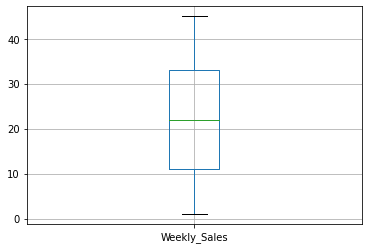

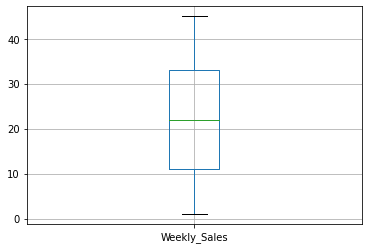

In [39]:
std = df['Weekly_Sales'].std()
mean = df['Weekly_Sales'].mean()
cut_off = std*2
lower, upper = mean - cut_off, mean + cut_off
trimmed_df = df[(data['Weekly_Sales'] < upper) & (df['Weekly_Sales'] > lower)]
       # The original histogram
df[['Weekly_Sales']].boxplot()
plt.show()
    # The trimmed histogram
trimmed_df[['Weekly_Sales']].boxplot()
plt.show()

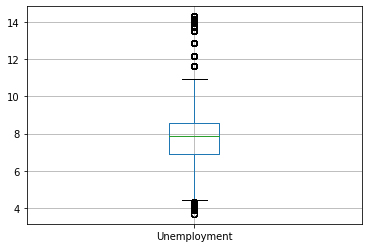

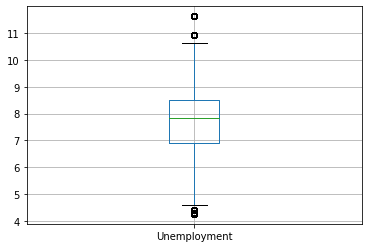

In [40]:
std = df['Unemployment'].std()
mean = df['Unemployment'].mean()
cut_off = std*2
lower, upper = mean - cut_off, mean + cut_off
trimmed_df2 = df[(df['Unemployment'] < upper) & (df['Unemployment'] > lower)]
       # The original histogram
df[['Unemployment']].boxplot()
plt.show()
    # The trimmed histogram
trimmed_df2[['Unemployment']].boxplot()
plt.show()

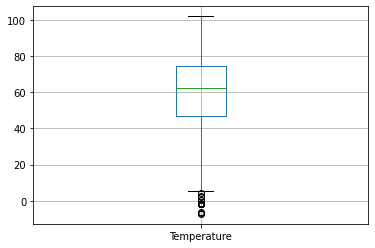

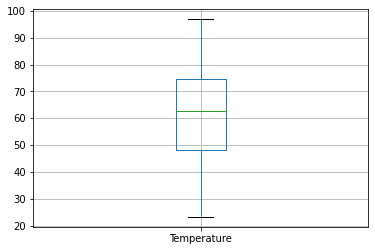

In [41]:
std = df['Temperature'].std()
mean = df['Temperature'].mean()
cut_off = std*2
lower, upper = mean - cut_off, mean + cut_off
trimmed_df3 = df[(df['Temperature'] < upper) & (df['Temperature'] > lower)]
       # The original histogram
df[['Temperature']].boxplot()
plt.show()
    # The trimmed histogram
trimmed_df3[['Temperature']].boxplot()
plt.show()

In [42]:
df.isnull().sum()

Store             0
Type              0
Size              0
Dept              0
Date              0
Weekly_Sales      0
IsHoliday         0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
MarkDown_Total    0
dtype: int64

In [43]:
final_df = df
final_df['Unemployment'] = trimmed_df2['Unemployment']
final_df['Temperature'] = trimmed_df3['Temperature']
final_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,MarkDown_Total
0,1,A,151315.0,1.0,2010-05-02,1.0,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0.0
1,1,A,151315.0,2.0,2010-05-02,1.0,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0.0
2,1,A,151315.0,3.0,2010-05-02,1.0,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0.0
3,1,A,151315.0,4.0,2010-05-02,1.0,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0.0
4,1,A,151315.0,5.0,2010-05-02,1.0,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0.0


In [44]:
final_df['Unemployment'].fillna(final_df['Unemployment'].mean(), inplace = True)
final_df['Temperature'].fillna(final_df['Temperature'].mean(), inplace = True)

In [45]:
final_df.isnull().sum()

Store             0
Type              0
Size              0
Dept              0
Date              0
Weekly_Sales      0
IsHoliday         0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
MarkDown_Total    0
dtype: int64

## Label encoding

In [46]:
final_df1 = pd.get_dummies(final_df, prefix = 'x', drop_first = True)

In [47]:
final_df1.columns

Index(['Size', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'MarkDown_Total', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6',
       'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15',
       'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24',
       'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33',
       'x_34', 'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42',
       'x_43', 'x_44', 'x_45', 'x_B', 'x_C', 'x_True'],
      dtype='object')

## Variable Transformation

- For all numerical variables having high level of skewness (out of range [-1, +1], a log transformation will correct the distribution to normal.
- For categorical variables, standardardisation will be applied instead

In [48]:
skew_df.Skewness.sort_values(ascending = False)

MarkDown5         19.008108
MarkDown3          8.395455
MarkDown2          5.430816
MarkDown4          4.848150
MarkDown1          3.367377
MarkDown_Total     2.752962
Unemployment       1.181317
CPI                0.085270
Weekly_Sales       0.077449
Fuel_Price        -0.108876
Temperature       -0.320460
Name: Skewness, dtype: float64

In [49]:
skew_var = ['MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5','Unemployment', 'MarkDown_Total']

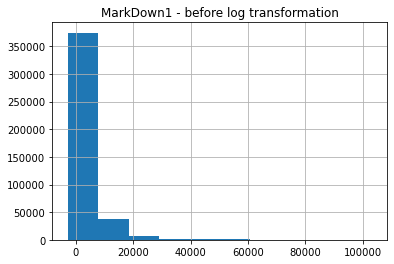

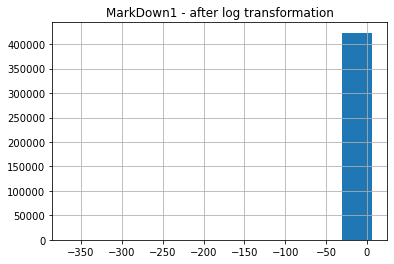

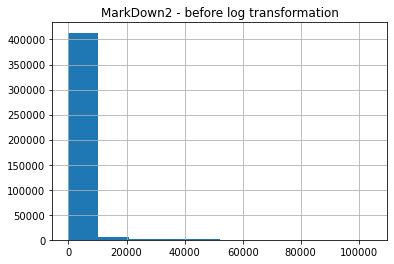

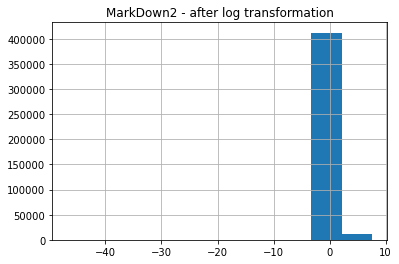

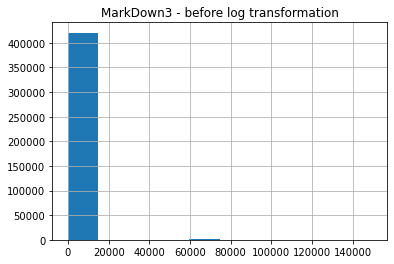

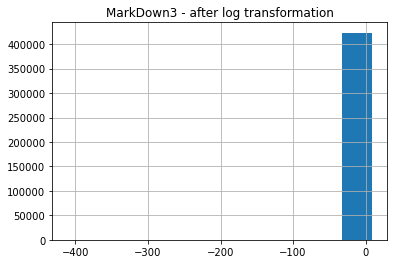

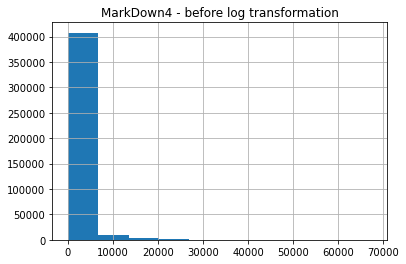

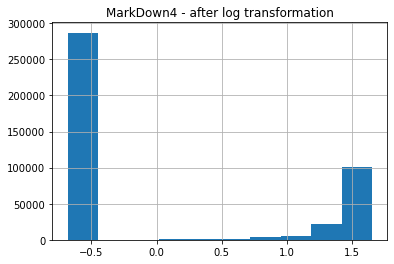

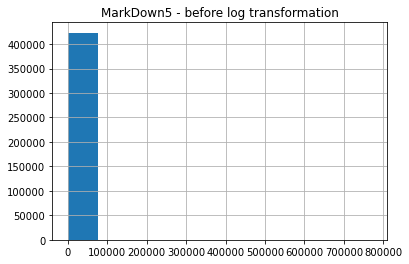

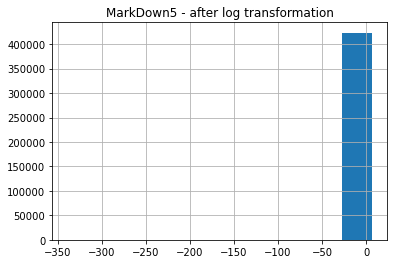

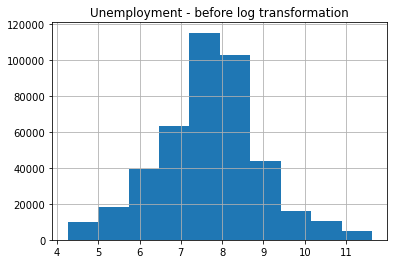

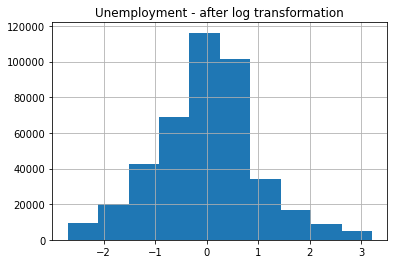

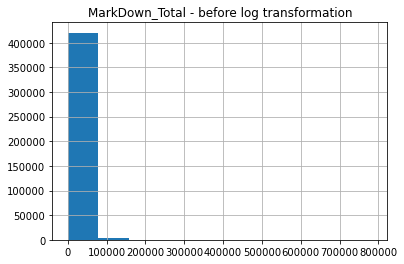

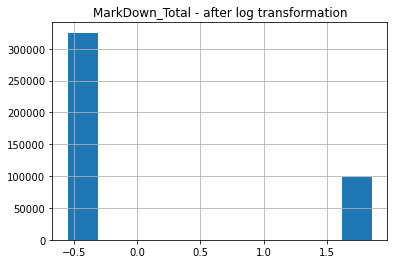

In [50]:
from sklearn.preprocessing import PowerTransformer
pow_trans = PowerTransformer()
for var in skew_var:
    pow_trans.fit(final_df1[[var]])
    final_df1[var] = pow_trans.transform(final_df1[[var]])
    data[var].hist()
    plt.title(var+ ' - before log transformation')
    plt.show()
    final_df1[var].hist()
    plt.title(var+ ' - after log transformation')
    plt.show()

### Encoding datatime variable

In [51]:
# Breaking down the Date variable to fit in the scaler
final_df1['Year'] = final_df1.Date.dt.year
final_df1['Month'] = final_df1.Date.dt.month
final_df1['Day'] = final_df1.Date.dt.day
final_df1.drop('Date', axis = 1, inplace = True)

In [52]:
final_df1.head()

,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,x_42,x_43,x_44,x_45,x_B,x_C,x_True,Year,Month,Day
0,151315.0,1.0,1.0,42.31,2.572,-0.48163,-0.21224,-0.244392,-0.683115,-0.612264,...,0,0,0,0,0,0,0,2010,5,2
1,151315.0,2.0,1.0,42.31,2.572,-0.48163,-0.21224,-0.244392,-0.683115,-0.612264,...,0,0,0,0,0,0,0,2010,5,2
2,151315.0,3.0,1.0,42.31,2.572,-0.48163,-0.21224,-0.244392,-0.683115,-0.612264,...,0,0,0,0,0,0,0,2010,5,2
3,151315.0,4.0,1.0,42.31,2.572,-0.48163,-0.21224,-0.244392,-0.683115,-0.612264,...,0,0,0,0,0,0,0,2010,5,2
4,151315.0,5.0,1.0,42.31,2.572,-0.48163,-0.21224,-0.244392,-0.683115,-0.612264,...,0,0,0,0,0,0,0,2010,5,2


## Exporting data

In [55]:
processed_retail_sales_predictions = final_df1
processed_retail_sales_predictions = processed_retail_sales_predictions.to_csv('processed_retail_prices.csv')